<a href="https://colab.research.google.com/github/LuisFTacla/WDW_Attendance_Calculator/blob/main/Analise_Rock_n_Roller_Coaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>ANÁLISE EXPLORATÓRIA DA ATRAÇÃO ROCK'N'ROLLER COASTER</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

# Fonte dos dados: 

https://touringplans.com/blog/2018/06/25/disney-world-wait-times-available-for-data-science-and-machine-learning/



### Variáveis utilizadas

> ### Data e hora
> ***

Instante em que as observações foram realizadas.

> ### Tempo de fila
> ***

Tempo estimado de espera que um visitante que entrasse na fila no dado instante teria de aguardar para andar na atração.

> ### Status
> ***

Status da atração em dado momentoo (aberta (1) / fechada (0)).


#### <font color='red'>Observação</font>
***
> Os dados brutos necessitam dos seguintes tratamento antes de serem analisados:
> 1. Eliminar os registros onde o <b>tempo de fila</b> é inválido (-999);
> 2. Eliminar os registros onde o <b>tempo de fila</b> é NaN;
> 3. Renomear as colunas para 'Data e hora' e 'Tempo de Fila';
> 4. Remover coluna <b>SACTMIN</b> devido a ausência da grande maioria de dados;


### Importando bibliotecas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
rrc = pd.read_csv('https://raw.githubusercontent.com/LuisFTacla/WDW_Attendance_Calculator/main/Dados/TouringPlans/Rides/Raw_Data/rock_n_rollercoaster.csv')

In [3]:
rrc.head(10)

,date,datetime,SACTMIN,SPOSTMIN
0,01/01/2015,2015-01-01 07:46:22,NaN,5.0
1,01/01/2015,2015-01-01 07:53:19,NaN,5.0
2,01/01/2015,2015-01-01 08:04:29,NaN,20.0
3,01/01/2015,2015-01-01 08:11:19,NaN,20.0
4,01/01/2015,2015-01-01 08:16:29,NaN,20.0
5,01/01/2015,2015-01-01 08:18:22,NaN,20.0
6,01/01/2015,2015-01-01 08:24:23,19.0,NaN
7,01/01/2015,2015-01-01 08:24:37,NaN,20.0
8,01/01/2015,2015-01-01 08:25:19,NaN,20.0
9,01/01/2015,2015-01-01 08:27:37,NaN,30.0


# <font color=green>2 TRATAMENTO DOS DADOS</font>
***

Para o tratamento dos dados, são declaradas funções que recebem o dataframe como parâmetro e, em cada uma, exerce uma modificação específica ao conjunto de dados retornando, por final, o dataframe tratado.

## <font color=green>2.1 Remoção da coluna 'SACTMIN'</font>
***

Coluna 'SACTMIN' possui mais lacunas do que dados úteis, por isso faz-se necessário removê-la.

In [4]:
def remove_sactmin(dados): 
  dados.drop(columns = ['SACTMIN'], inplace = True)
  return dados

## <font color=green>2.2 Remoção de linhas com dados ausentes (NaN) na coluna 'SPOSTMIN'</font>
***


In [5]:
def remove_dados_ausentes(dados):
  dados.dropna(inplace= True)
  return dados

## <font color=green>2.3 Conversão das datas e horas</font>
***

Os dados de 'datetime' estão armazenados como strings. Nesta função, é feita a conversão para timestamps os dados são cpoiados para a coluna recém criada 'data_e_hora'.

In [6]:
def to_datetime(dados):
  dados['data_e_hora'] = pd.to_datetime(dados['datetime'])
  return dados

## <font color=green>2.4 Criação da coluna 'tempo_de_fila' e copiando os dados da coluna 'SPOSTMIN'</font>
***

In [7]:
def cria_coluna_tempo_de_fila(dados):
  dados['tempo_de_fila'] = dados['SPOSTMIN']
  return dados

## <font color=green>2.5 Removendo colunas</font>
***

As colunas 'SPOSTMIN', 'date' e 'datetime' ja possuem seus dados devidamente convertidos e copiados nas colunas criadas, logo, pode-se fazer a remoção.



In [8]:
def remove_colunas(dados):
  dados.drop(columns = ['SPOSTMIN', 'date', 'datetime'], inplace = True)
  return dados

## <font color=green>2.6 Reset Index</font>
***
Com o apagamento de linhas, a numeração do índice contém lacunas.

In [9]:
def reset_index(dados):
  dados.reset_index(drop = True, inplace = True)
  return dados

## <font color=green>2.7 Tratamento</font>
***

Para evitar chamar cada função manualmente, é declarada uma função geral que, dentro dela, são chamadas as funções acima em ordem.

In [10]:
def tratamento_dados(dados):
  remove_sactmin(dados)
  remove_dados_ausentes(dados)
  to_datetime(dados)
  cria_coluna_tempo_de_fila(dados)
  remove_colunas(dados)
  reset_index(dados)

Tratando os dados:

In [11]:
tratamento_dados(rrc)

Visualizando os dados:

In [12]:
rrc.head(10)

,data_e_hora,tempo_de_fila
0,2015-01-01 07:46:22,5.0
1,2015-01-01 07:53:19,5.0
2,2015-01-01 08:04:29,20.0
3,2015-01-01 08:11:19,20.0
4,2015-01-01 08:16:29,20.0
5,2015-01-01 08:18:22,20.0
6,2015-01-01 08:24:37,20.0
7,2015-01-01 08:25:19,20.0
8,2015-01-01 08:27:37,30.0
9,2015-01-01 08:31:20,30.0


## <font color=green>2.8 Filtrando os dados</font>
***

In [13]:
rrc.tempo_de_fila.min()

-999.0

Como podemos ver na célula acima, ainda não terminamos a "limpeza" dos dados! Existem dados inválidos, com valores de -999. Para removê-los, basta aplicarmos um filtro no dataframe:

In [14]:
filtro = rrc.tempo_de_fila >= 0
rrc = rrc[filtro]

In [15]:
rrc.tempo_de_fila.min()

0.0

# <font color=green>3 AJUSTE DOS DADOS</font>
***

Os dados já estão tratados, porém nota-se que as observações foram feitas em horários muito "quebrados". A fim de tornar a plotagem mais esteticamente agradável, iremos ajustar o dataframe para mostrar os dados em instantes de 5 em 5 minutos.


Para fazer esse ajuste, será usada a função de interpolação **interp()** da biblioteca **numpy**. Essa função será chamada da seguinte forma:


> Y_interp = np.interp(X_interp, X, Y)


Sendo:

Y_interp = o resultado final da interpolação, no caso, os dados ajustados;

X_interp = o 'passo' onde os dados serão 'encaixados', ou seja, os instantes listados de 5 em 5 minutos;

X = os instantes das observações, em horários não ajustados;

Y = os dados de tempos de fila.


Antes de realizar a interpolação, precisamos fazer duas coisas: criar um dataframe de 'base' em que listaremos os instantes de 5 em 5 minutos, o qual usaremos na interpolação; unir a base com os dados, reordenar de acordo com a data e filtrar este novo dataframe. 

#### <font color='red'>Observação</font>
***
> Este último passo se faz necessário pois, como os parques não operam durante a madrugada, não há observações nos dados brutos. O problema seria visto durante a plotagem dos gráficos diários. Como a última observação de um dia i e a primeira do dia i+1 não são iguais a zero, a função interp iria atribuir valores diferentes de zero nos horários de parque fechado.

> Exemplificando: supondo que no dia 25, o último dado foi obtido às 23h37, com a fila tendo 5 minutos de duração. No dia 26, por sua vez, o primeiro dado, obtido às 7h49, mostra que a fila está com 10 minutos. A função interp iria atribuir a todo esse intervalo valores crescentes entre 5 e 10 minutos, como se houvesse alguma fila durante a madrugada, o que não condiz com a realidade.

## <font color=green>3.1 Criando dataframe 'base'</font>
***

#### <font color='red'>Observação</font>
***
> O número de observações do dataframe base é obtido com os seguintes dados:

365 dias por ano;

5 anos de dados (2015 a 2019);

1 dia a mais por ano bissexto (2016);

24 horas por dia;

12 intervalos de 5 minutos dentro de 1 hora.

In [16]:
# Calculando numero de observacoes
n_observacoes = ((365 * 5) + 1) * 24 * 12


# Criação de um índice de datas/horas
instantes_5_em_5 = pd.date_range(start='1/1/2015',
                                 periods = n_observacoes,  
                                 freq = '5min')

# Criação do dataframe de base
base = pd.DataFrame(index = range(0,n_observacoes), 
                    columns = ['data_e_hora', 
                               'tempo_de_fila'])
base['data_e_hora'] = instantes_5_em_5
base['tempo_de_fila'] = 0

In [17]:
base.head(10)

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0
1,2015-01-01 00:05:00,0
2,2015-01-01 00:10:00,0
3,2015-01-01 00:15:00,0
4,2015-01-01 00:20:00,0
5,2015-01-01 00:25:00,0
6,2015-01-01 00:30:00,0
7,2015-01-01 00:35:00,0
8,2015-01-01 00:40:00,0
9,2015-01-01 00:45:00,0


## <font color=green>3.2 Unindo dataframes base + dados</font>
***

In [18]:
rrc_df = base.append(rrc)

In [19]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
211432,2019-12-31 22:58:02,45.0
211433,2019-12-31 23:09:02,35.0
211434,2019-12-31 23:16:02,35.0
211435,2019-12-31 23:23:02,35.0


## <font color=green>3.3 Ordenando dados pela data e hora</font>
***

In [20]:
rrc_df.sort_values(by = ['data_e_hora'], inplace = True)

In [21]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
525883,2019-12-31 23:35:00,0.0
525884,2019-12-31 23:40:00,0.0
525885,2019-12-31 23:45:00,0.0
525886,2019-12-31 23:50:00,0.0


## <font color=green>3.4 Reset Index</font>
***

In [22]:
reset_index(rrc_df)

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
725259,2019-12-31 23:35:00,0.0
725260,2019-12-31 23:40:00,0.0
725261,2019-12-31 23:45:00,0.0
725262,2019-12-31 23:50:00,0.0


## <font color=green>3.5 Apagando linhas</font>
***

#### <font color='red'>Observação</font>
***
> Esse passo é necessário pois ao misturar os dataframes base e dados, em meio aos dados, existem algumas linhas com valores iguais a zero, vindas do dataframe de base. Neste passo, iremos criar uma coluna 'apagar' que receberá valores booleanos. Se o campo em que o algoritmo analisar cumprir uma das condições, este será deletado.

In [23]:
rrc_df['apagar'] = 0

In [24]:
rrc_df

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
725259,2019-12-31 23:35:00,0.0,0
725260,2019-12-31 23:40:00,0.0,0
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0


A condição para uma linha ser deletada é se, primeiro, o valor do tempo de fila dela for igual à zero, e se um dos dois valores seguintes ou dois valores anteriores de tempos de fila for diferente de zero. Ou seja, caso os quatro sejam iguais à zero, a linha permanece. Mas se apenas um deles for diferente de zero, a linha é deletada.

In [25]:
for i in range(0,len(rrc_df)):
    if 1 < i < len(rrc_df) - 2:
      if (rrc_df.tempo_de_fila[i] == 0):
        c1 = (rrc_df.tempo_de_fila[i + 1] != 0)
        c2 = (rrc_df.tempo_de_fila[i - 1] != 0)
        c3 = (rrc_df.tempo_de_fila[i + 2] != 0)
        c4 = (rrc_df.tempo_de_fila[i - 2] != 0)
        if c1 or c2 or c3 or c4:
          rrc_df.apagar[i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Essa seleção pode ser notada logo no final da série de dados:

In [26]:
rrc_df.tail(10)

,data_e_hora,tempo_de_fila,apagar
725254,2019-12-31 23:20:00,0.0,1
725255,2019-12-31 23:23:02,35.0,0
725256,2019-12-31 23:25:00,0.0,1
725257,2019-12-31 23:30:00,0.0,1
725258,2019-12-31 23:30:02,35.0,0
725259,2019-12-31 23:35:00,0.0,1
725260,2019-12-31 23:40:00,0.0,1
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0
725263,2019-12-31 23:55:00,0.0,0


Feita a seleção, agora basta apenas filtrar o dataframe.

In [27]:
filtro2 = rrc_df.apagar == 0 
rrc_df = rrc_df[filtro2]

Podemos notar que o filtro foi aplicado com sucesso:

In [28]:
rrc_df.tail(10)

,data_e_hora,tempo_de_fila,apagar
725242,2019-12-31 22:44:01,60.0,0
725245,2019-12-31 22:51:02,45.0,0
725247,2019-12-31 22:58:02,45.0,0
725250,2019-12-31 23:09:02,35.0,0
725253,2019-12-31 23:16:02,35.0,0
725255,2019-12-31 23:23:02,35.0,0
725258,2019-12-31 23:30:02,35.0,0
725261,2019-12-31 23:45:00,0.0,0
725262,2019-12-31 23:50:00,0.0,0
725263,2019-12-31 23:55:00,0.0,0


## <font color=green>3.6 Reset Index e deletando a coluna 'apagar'</font>
***

In [29]:
reset_index(rrc_df)

,data_e_hora,tempo_de_fila,apagar
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
455491,2019-12-31 23:23:02,35.0,0
455492,2019-12-31 23:30:02,35.0,0
455493,2019-12-31 23:45:00,0.0,0
455494,2019-12-31 23:50:00,0.0,0


In [30]:
rrc_df.drop(columns = ['apagar'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
rrc_df

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
455491,2019-12-31 23:23:02,35.0
455492,2019-12-31 23:30:02,35.0
455493,2019-12-31 23:45:00,0.0
455494,2019-12-31 23:50:00,0.0


## <font color=green>3.7 Interpolação dos tempos de fila</font>
***

In [32]:
X_interp = base.data_e_hora
X = rrc_df.data_e_hora
Y = rrc_df.tempo_de_fila

Y_interp = np.interp(X_interp, X, Y)

## <font color=green>3.8 Criação do dataframe final</font>
***

In [33]:
RocknRollerCoaster = pd.DataFrame(index = range(0,n_observacoes), 
                                  columns = ['data_e_hora', 'tempo_de_fila'])
RocknRollerCoaster['data_e_hora'] = instantes_5_em_5
RocknRollerCoaster['tempo_de_fila'] = np.around(Y_interp)

In [34]:
RocknRollerCoaster

,data_e_hora,tempo_de_fila
0,2015-01-01 00:00:00,0.0
1,2015-01-01 00:05:00,0.0
2,2015-01-01 00:10:00,0.0
3,2015-01-01 00:15:00,0.0
4,2015-01-01 00:20:00,0.0
...,...,...
525883,2019-12-31 23:35:00,23.0
525884,2019-12-31 23:40:00,12.0
525885,2019-12-31 23:45:00,0.0
525886,2019-12-31 23:50:00,0.0


# <font color=green>4 GRÁFICOS</font>
***

## <font color=green>4.1 Gráficos diários</font>
***

Para plotar a variação da fila ao longo de um dia, declaramos uma função que recebe como parâmetros os valores da data escolhida (dia, mês e ano).


In [35]:
def plota_fila_diaria (d, m, y):
  fig = plt.figure(figsize = (15,8))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(RocknRollerCoaster['data_e_hora'], 
            RocknRollerCoaster['tempo_de_fila'], 
            color = 'g')
  data_escolhida = datetime(y, m, d)
  dia_seguinte = data_escolhida + timedelta(days = 1)
  eixo.set_xlim(data_escolhida,dia_seguinte)
  eixo.set_title('Tempo de fila ao longo do dia {}/{}/{}'.format(d, m, y), 
                 fontsize = 25)
  eixo.legend(['Tempo de fila'], loc = 'upper right', fontsize = 15)

Para exemplificar, serão plotadas 6 datas:

*   25/12/2015 - Natal
*   04/07/2016 - Independência dos EUA
*   06/09/2017 - Baixa temporada (pouco movimento esperado)
*   31/12/2018 - Véspera de Ano Novo
*   1/1/2019 - Inauguração de Star Wars Galaxy's Edge
*   29/08/2019 - Inauguração de Star Wars Galaxy's Edge



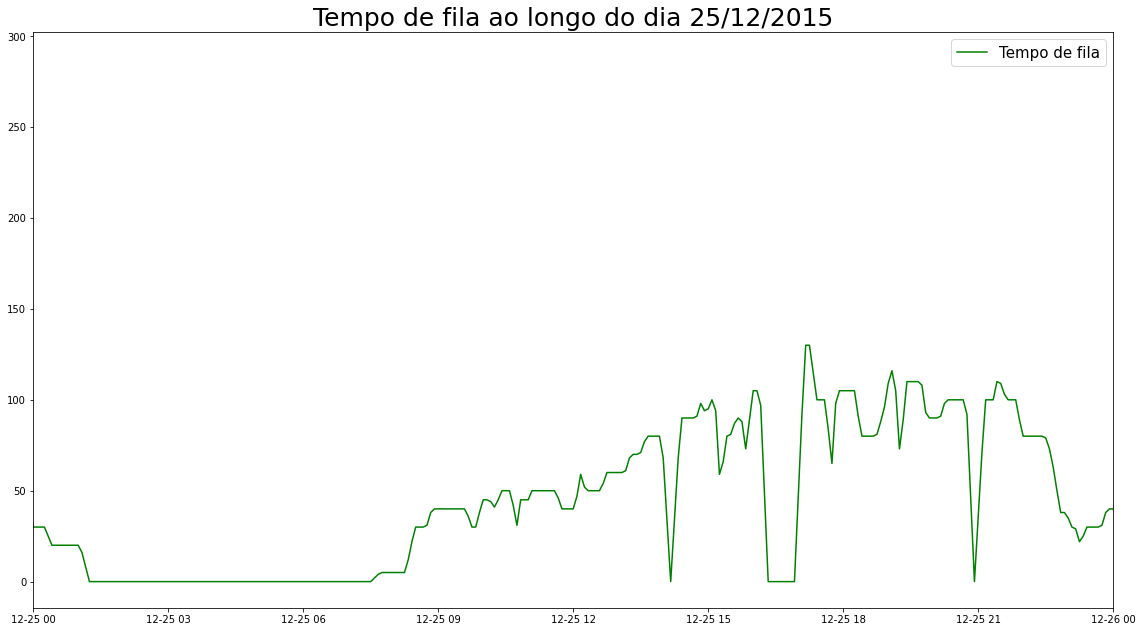

In [36]:
plota_fila_diaria(25, 12, 2015)

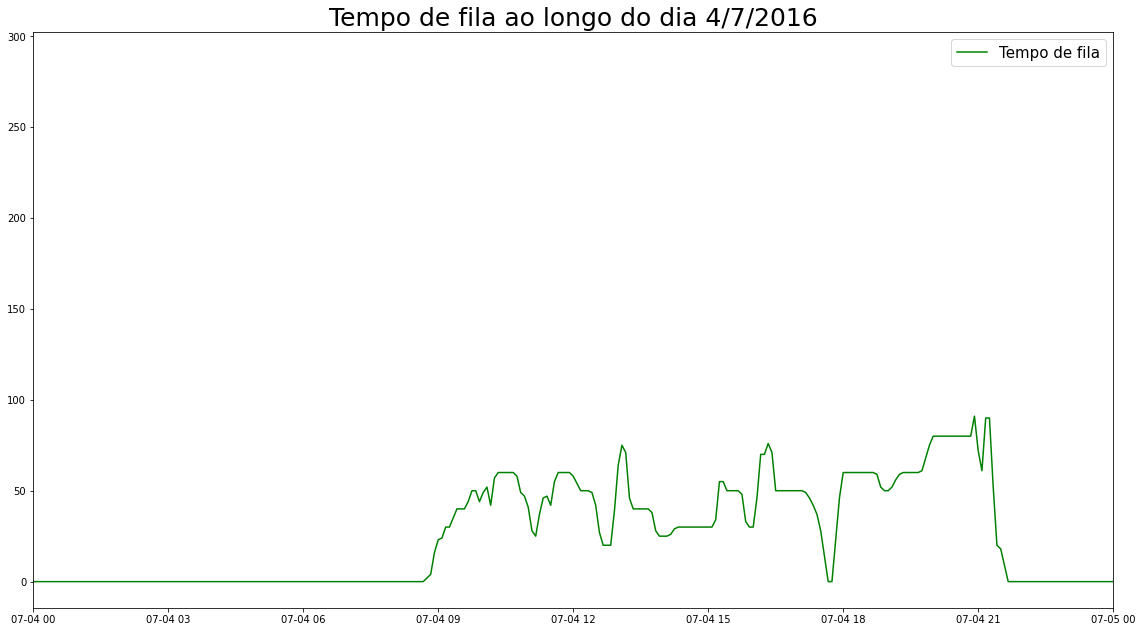

In [37]:
plota_fila_diaria(4, 7, 2016)

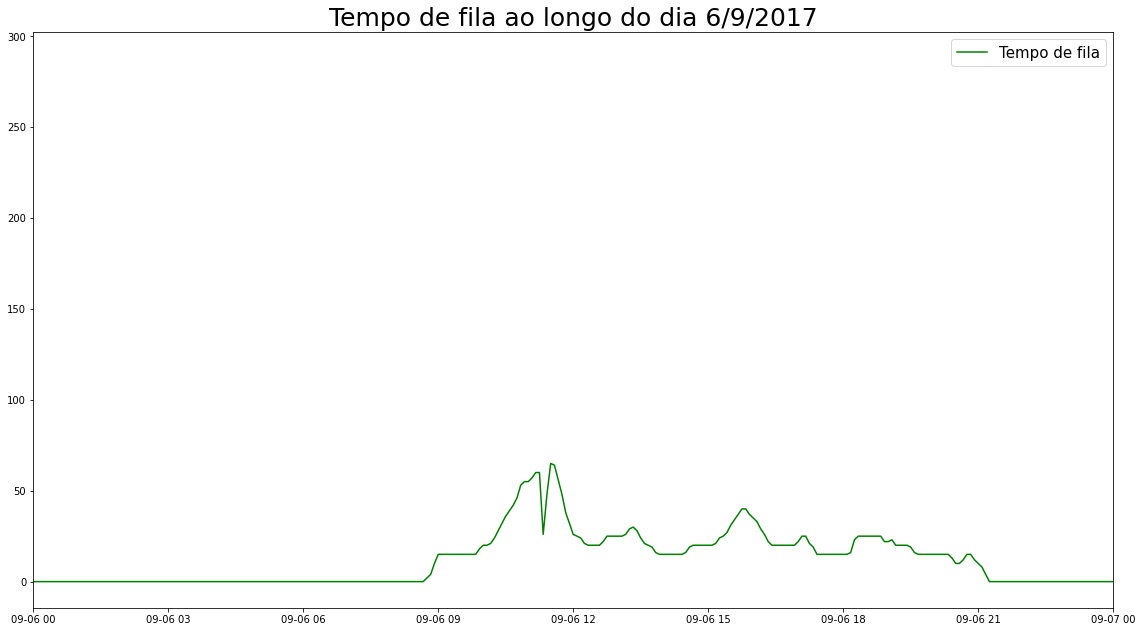

In [38]:
plota_fila_diaria(6, 9, 2017)

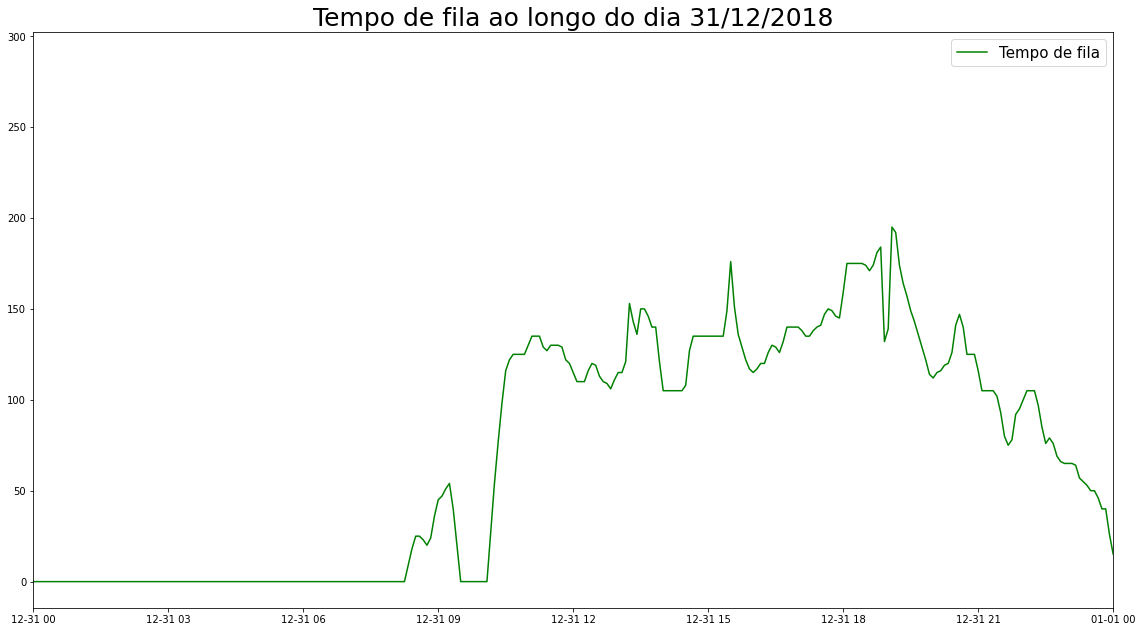

In [39]:
plota_fila_diaria(31, 12, 2018)

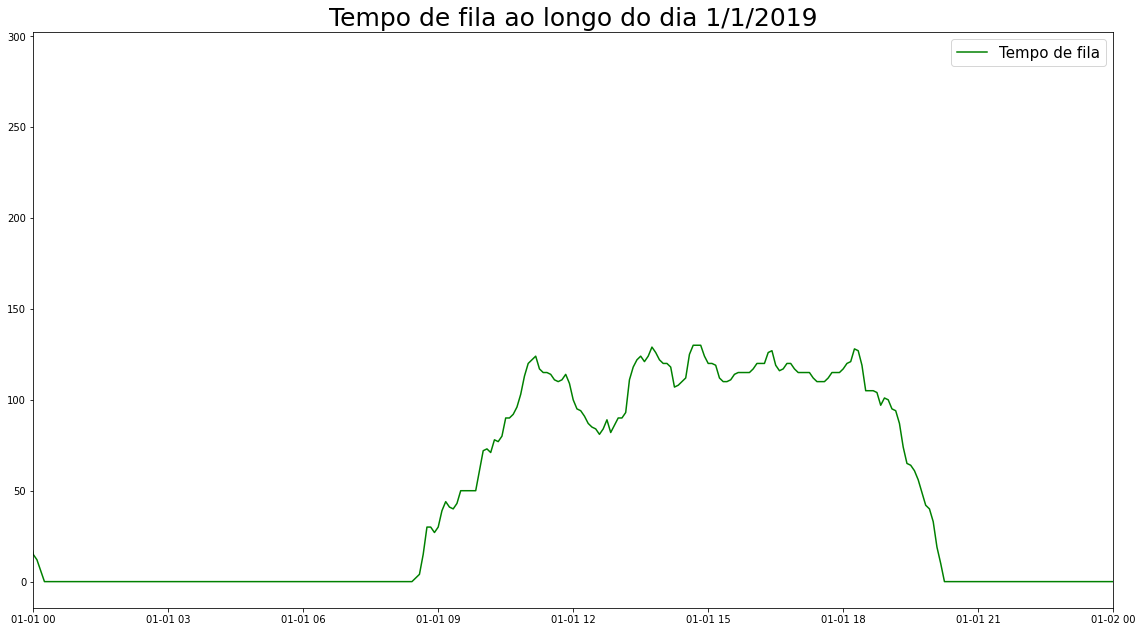

In [40]:
plota_fila_diaria(1, 1, 2019)

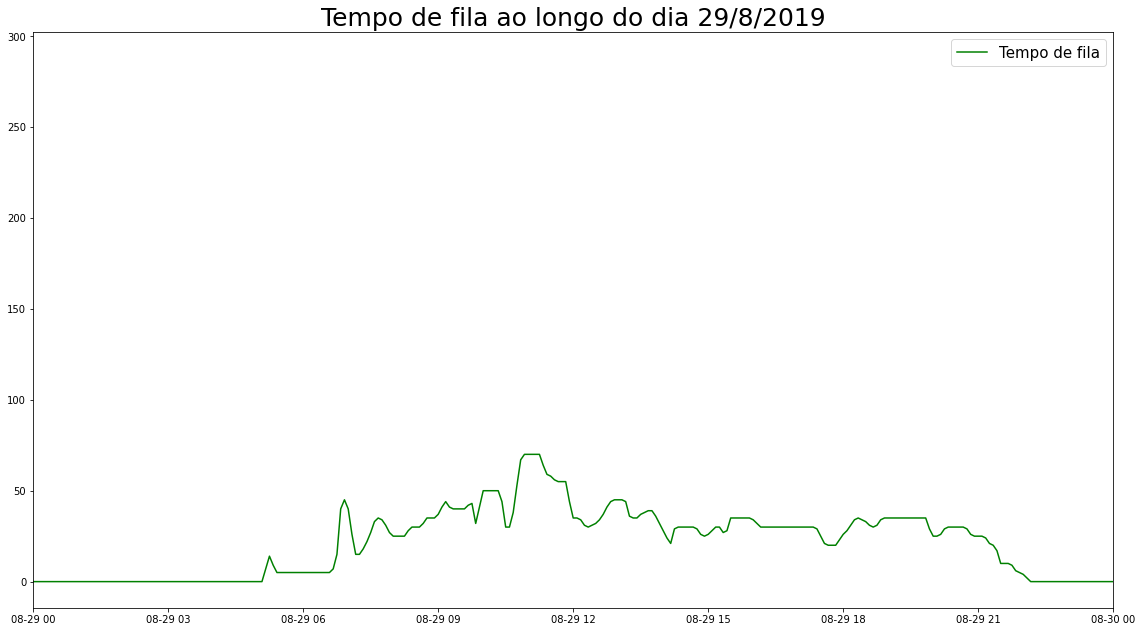

In [41]:
plota_fila_diaria(29, 8, 2019)

Temos gráficos de feriados, dia de inauguração no parque e um dia de baixa temporada.

Algumas conclusões podemos tirar dos gráficos plotados:

A temporada de final de ano aparenta ser mais cheia do que no verão (4 de julho);

A inauguração de Star Wars Galaxy's Edge não trouxe muito movimento para a Rock'n'Roller Coaster, porém, pode-se reparar que no dia, o parque foi aberto antes das 6h da manhã. Em outras atrações, o movimento pode ter sido maior;

Alguns gráficos apresentaram 'vales' significativos, isso é, com o tempo de fila marcando zero minutos no meio do dia. Isso provavelmente é um indicativo que naquele horário, a atração apresentou alguma falha que exigiu manutenção, retomando em seguida a operação.

## <font color=green>4.2 Gráficos anuais</font>
***

Para gerar os gráficos anuais, é preciso, inicialmente, agrupar os dados. Para cada dia, os dados foram agrupados pela média dos tempos de fila. Porém, não iremos considerar os dados de quando a atração estava fechada, seja por manutenção ou pelo parque estar fechado. Resumidamente, os tempos de fila iguais à zero serão descartados.

Para isso, criamos a coluna 'Status', na qual, através de uma variável booleana, informaremos se o brinquedo está aberto (1) ou fechado (0) e a condição para tal será o valor do tempo de fila.

In [42]:
RocknRollerCoaster['Status'] = 0

In [43]:
RocknRollerCoaster

,data_e_hora,tempo_de_fila,Status
0,2015-01-01 00:00:00,0.0,0
1,2015-01-01 00:05:00,0.0,0
2,2015-01-01 00:10:00,0.0,0
3,2015-01-01 00:15:00,0.0,0
4,2015-01-01 00:20:00,0.0,0
...,...,...,...
525883,2019-12-31 23:35:00,23.0,0
525884,2019-12-31 23:40:00,12.0,0
525885,2019-12-31 23:45:00,0.0,0
525886,2019-12-31 23:50:00,0.0,0


In [44]:
for i in range(0,len(RocknRollerCoaster)):
  if RocknRollerCoaster.tempo_de_fila[i] != 0:
    RocknRollerCoaster.Status[i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Semelhante a procedimentos anteriores, filtramos os dados de acordo com a coluna 'Status'.

In [45]:
filtro3 = RocknRollerCoaster.Status == 1

In [46]:
RocknRollerCoaster_Filtrado = RocknRollerCoaster[filtro3]

In [47]:
RocknRollerCoaster_Filtrado

,data_e_hora,tempo_de_fila,Status
92,2015-01-01 07:40:00,2.0,1
93,2015-01-01 07:45:00,4.0,1
94,2015-01-01 07:50:00,5.0,1
95,2015-01-01 07:55:00,7.0,1
96,2015-01-01 08:00:00,14.0,1
...,...,...,...
525880,2019-12-31 23:20:00,35.0,1
525881,2019-12-31 23:25:00,35.0,1
525882,2019-12-31 23:30:00,35.0,1
525883,2019-12-31 23:35:00,23.0,1


Podemos, agora, deletar a coluna 'Status'.

In [48]:
RocknRollerCoaster_Filtrado.drop(columns = ['Status'], 
                                 inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
RocknRollerCoaster_Filtrado

,data_e_hora,tempo_de_fila
92,2015-01-01 07:40:00,2.0
93,2015-01-01 07:45:00,4.0
94,2015-01-01 07:50:00,5.0
95,2015-01-01 07:55:00,7.0
96,2015-01-01 08:00:00,14.0
...,...,...
525880,2019-12-31 23:20:00,35.0
525881,2019-12-31 23:25:00,35.0
525882,2019-12-31 23:30:00,35.0
525883,2019-12-31 23:35:00,23.0


Agora sim, agrupamos os dados pela data e calculamos o tempo médio de fila para cada dia.

In [50]:
medias = RocknRollerCoaster_Filtrado.groupby(RocknRollerCoaster_Filtrado['data_e_hora'].dt.date)['tempo_de_fila'].mean()

Podemos observar que um array foi criado com os valores médios:

In [51]:
medias

data_e_hora
2015-01-01     74.549133
2015-01-02     80.424419
2015-01-03     87.267717
2015-01-04      3.400000
2015-01-05     61.316770
                 ...    
2019-12-27     92.793814
2019-12-28     92.288660
2019-12-29    114.664948
2019-12-30    123.742268
2019-12-31     96.534759
Name: tempo_de_fila, Length: 1807, dtype: float64

Porém, notamos que não temos todos os dias nessa Series. Isso por quê em algumas épocas, a atração em que estamos analisando ficou vários dias fechada, para uma manutenção mais pesada, provavelmente, e todos os dados daqueles dias foram excluídos. Para corrigir isso, criamos 3 dataframes:

1. medias_series que receberá diretamente os dados da Panda Series criada;
2. datas_df que receberá um array contendo todas as datas de 2015 a 2019;
3. Medias_RocknRollerCoaster que será o DataFrame final, usado para gerar os gráficos.

In [52]:
dias = (365 * 5) + 1

In [53]:
dias

1826

In [54]:
datas = pd.date_range(start = '1/1/2015', 
                      periods = dias, 
                      freq = 'd')
index_days = range(0, dias)

In [55]:
medias_array = pd.DataFrame(data = medias)

datas_df = pd.DataFrame(index = index_days,
                        columns = ['data'])

Medias_RocknRollerCoaster = pd.DataFrame(index = index_days,
                                         columns = ['data', 
                                                    'tempo_medio'])

In [56]:
medias_array.reset_index(inplace = True)
medias_array.rename(columns={'data_e_hora': 'data',
                             'tempo_de_fila': 'tempo_medio'}, 
                    inplace = True)

datas_df['data'] = datas

Medias_RocknRollerCoaster['data'] = datas

In [57]:
medias_array.head()

,data,tempo_medio
0,2015-01-01,74.549133
1,2015-01-02,80.424419
2,2015-01-03,87.267717
3,2015-01-04,3.400000
4,2015-01-05,61.316770


In [58]:
datas_df.head()

,data
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [59]:
Medias_RocknRollerCoaster.head()

,data,tempo_medio
0,2015-01-01,NaN
1,2015-01-02,NaN
2,2015-01-03,NaN
3,2015-01-04,NaN
4,2015-01-05,NaN


In [60]:
Medias_RocknRollerCoaster.tempo_medio = 0

for i in range(0,len(datas_df)):
  for j in range(0,len(medias_array)):
    if datas_df.data[i] == medias_array.data[j]:
      Medias_RocknRollerCoaster.tempo_medio[i] = medias_array.tempo_medio[j]
      break



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
Medias_RocknRollerCoaster

,data,tempo_medio
0,2015-01-01,74
1,2015-01-02,80
2,2015-01-03,87
3,2015-01-04,3
4,2015-01-05,61
...,...,...
1821,2019-12-27,92
1822,2019-12-28,92
1823,2019-12-29,114
1824,2019-12-30,123


Declaramos a função que irá plotar os gráficos anuais, que recebe apenas o ano como parâmetro.

In [62]:
def plota_anual(ano):
  fig = plt.figure(figsize = (20,12))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(Medias_RocknRollerCoaster['data'], 
            Medias_RocknRollerCoaster['tempo_medio'], 
            color = 'g')
  data_inicial = datetime(ano, 1, 1)
  data_final = datetime((ano + 1), 1, 1)
  eixo.set_xlim(data_inicial, data_final)
  eixo.set_title('Tempos médios diários em {}'.format(ano), fontsize = 25)
  eixo.set_xlabel('Data', fontsize = 20)  
  eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)
  eixo.legend(['Média do dia'], loc = 'upper right', fontsize = 15)

Podemos plotar, então, todos os anos.

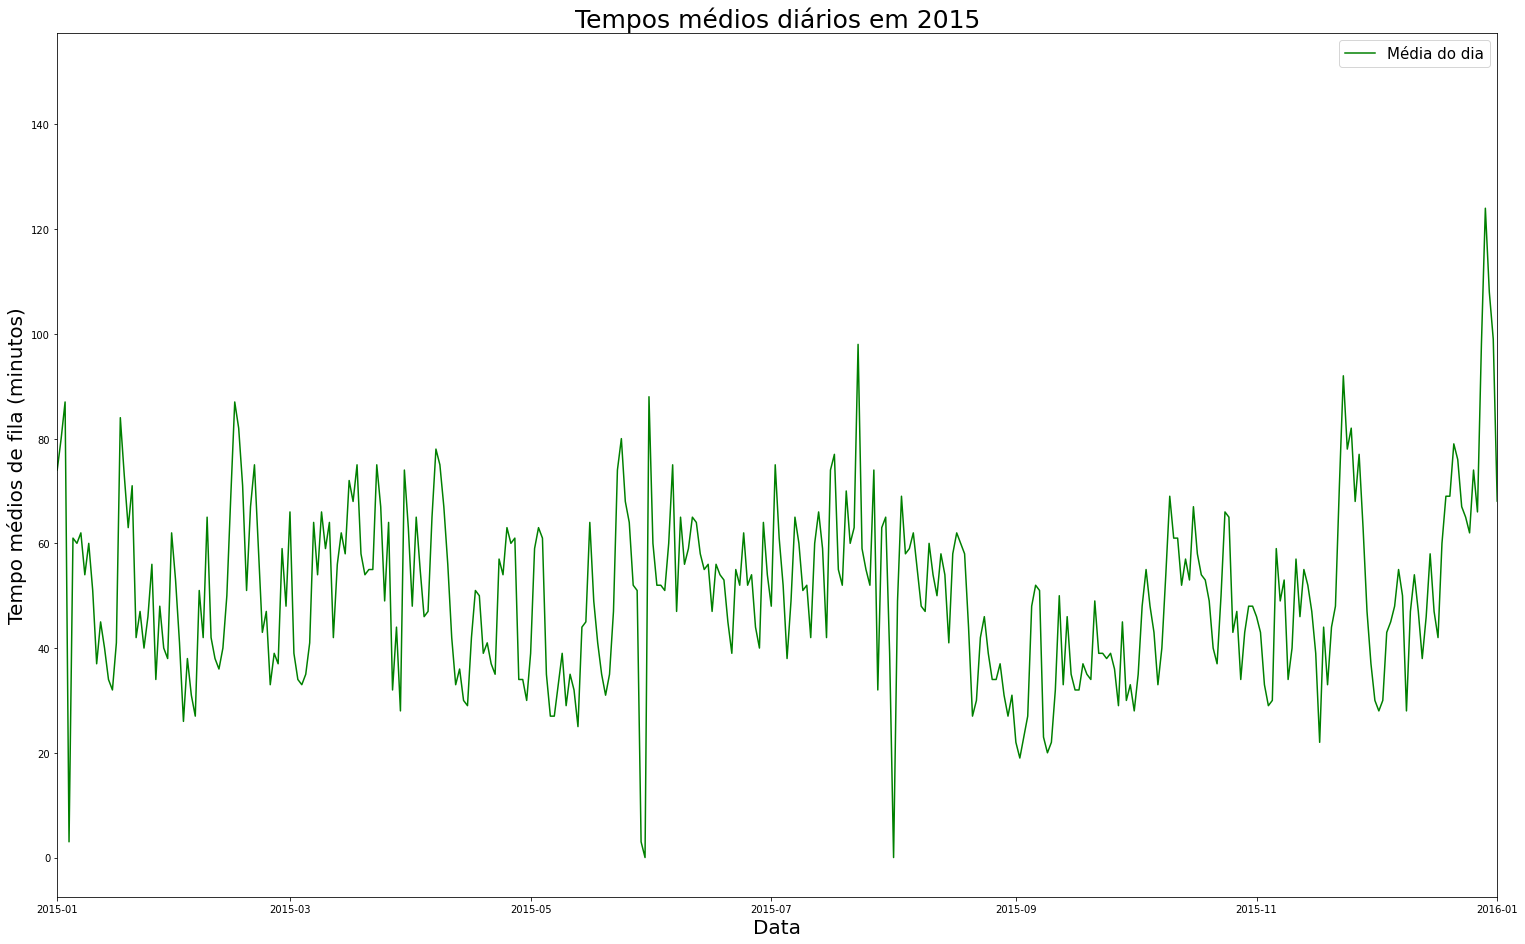

In [63]:
plota_anual(2015)

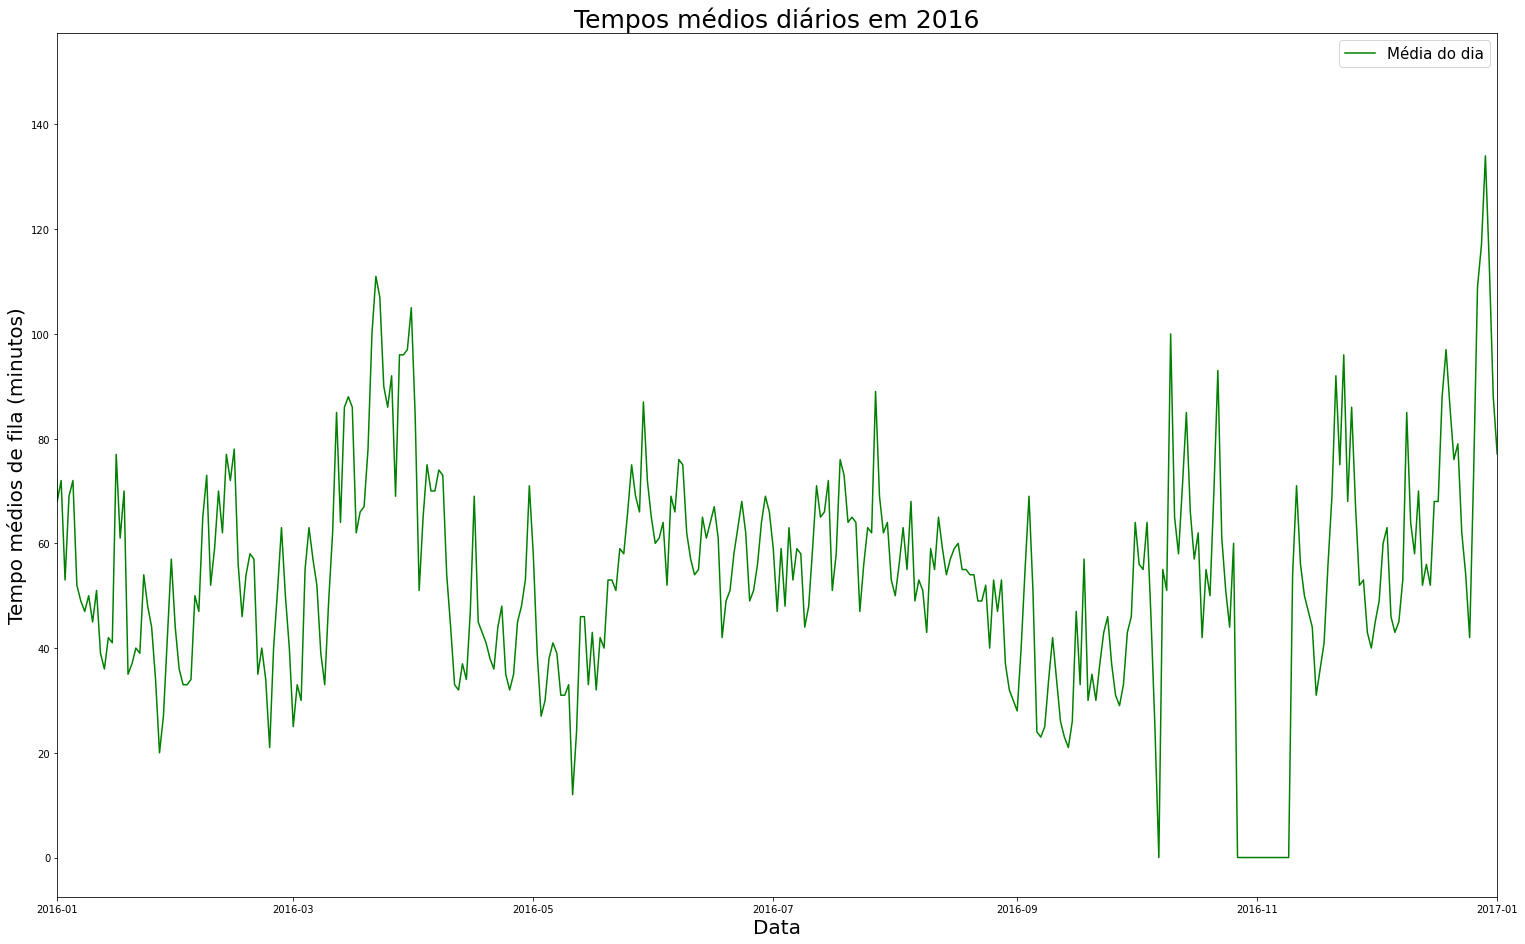

In [64]:
plota_anual(2016)

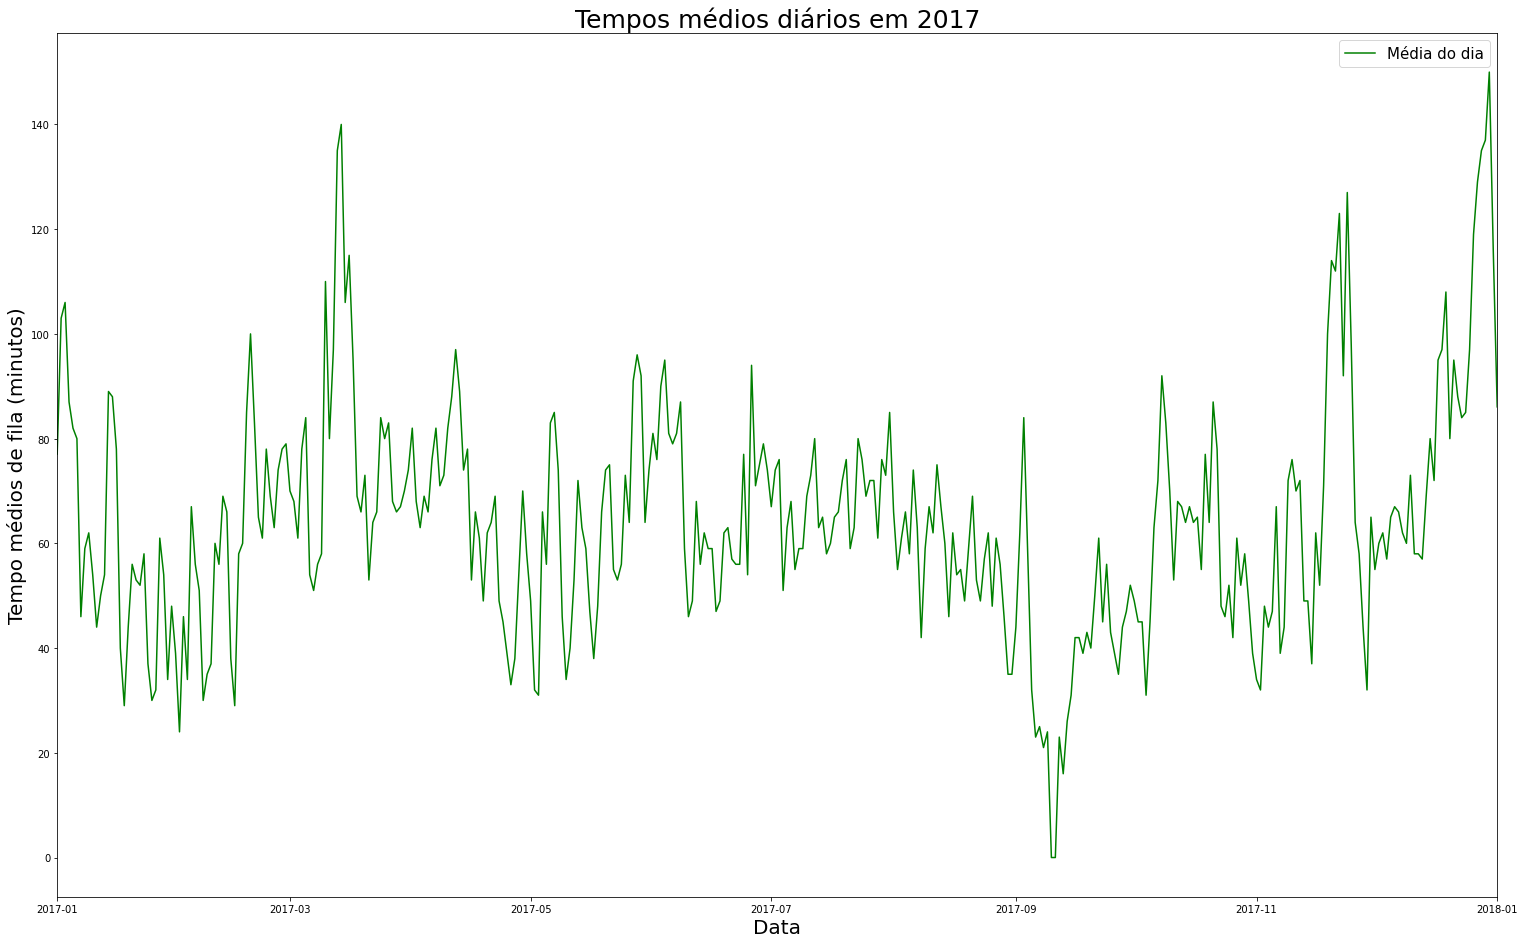

In [65]:
plota_anual(2017)

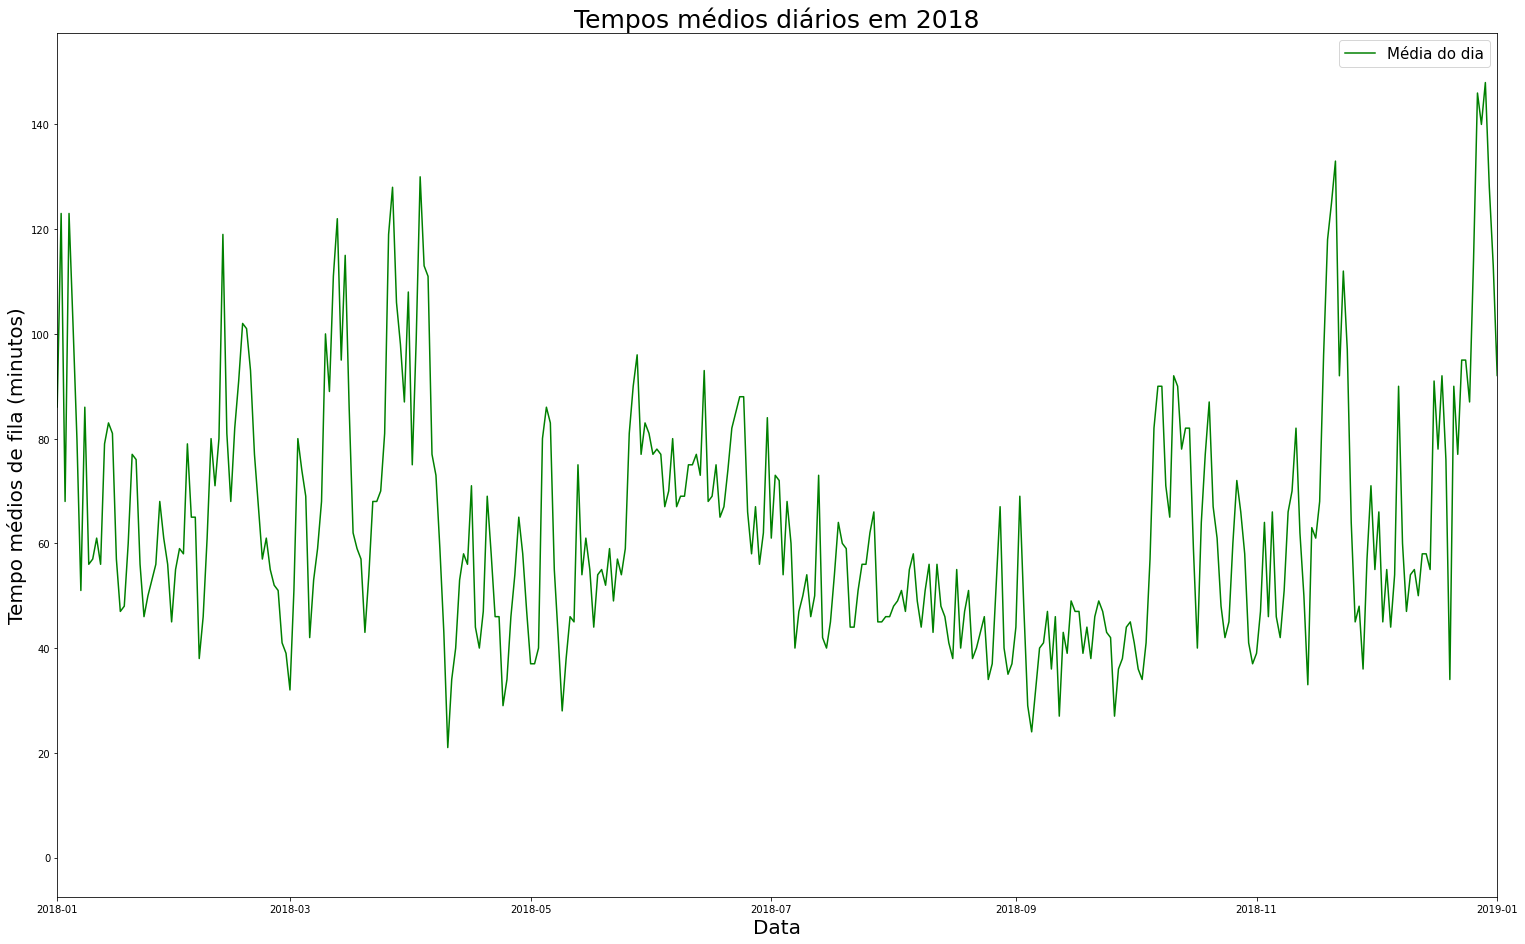

In [66]:
plota_anual(2018)

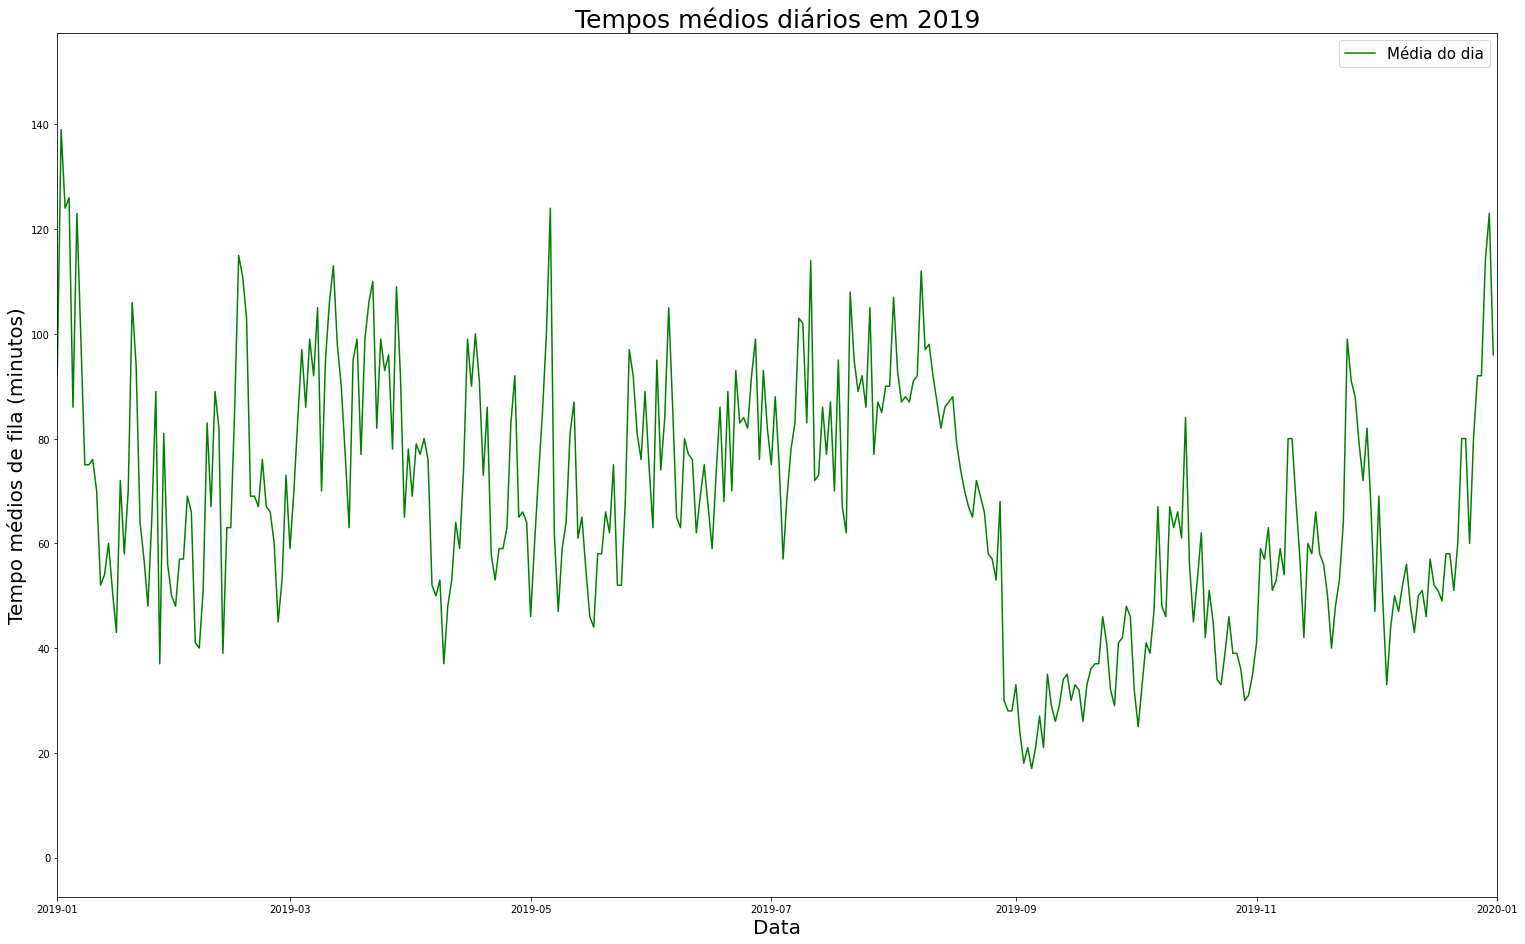

In [67]:
plota_anual(2019)

## <font color=green>4.3 Gráfico de todo o período</font>
***

In [68]:
def plot_cinco_anos():
  fig = plt.figure(figsize = (60,12))
  eixo = fig.add_axes([0, 0, 1, 1])
  eixo.plot(Medias_RocknRollerCoaster['data'], 
            Medias_RocknRollerCoaster['tempo_medio'], 
            color = 'g')


  eixo.set_title('Tempos médios diários', fontsize = 25)
  eixo.set_xlabel('Data', fontsize = 20)  
  eixo.set_ylabel('Tempo médios de fila (minutos)', fontsize = 20)
  eixo.legend(['Média do dia'], loc = 'upper right', fontsize = 15)

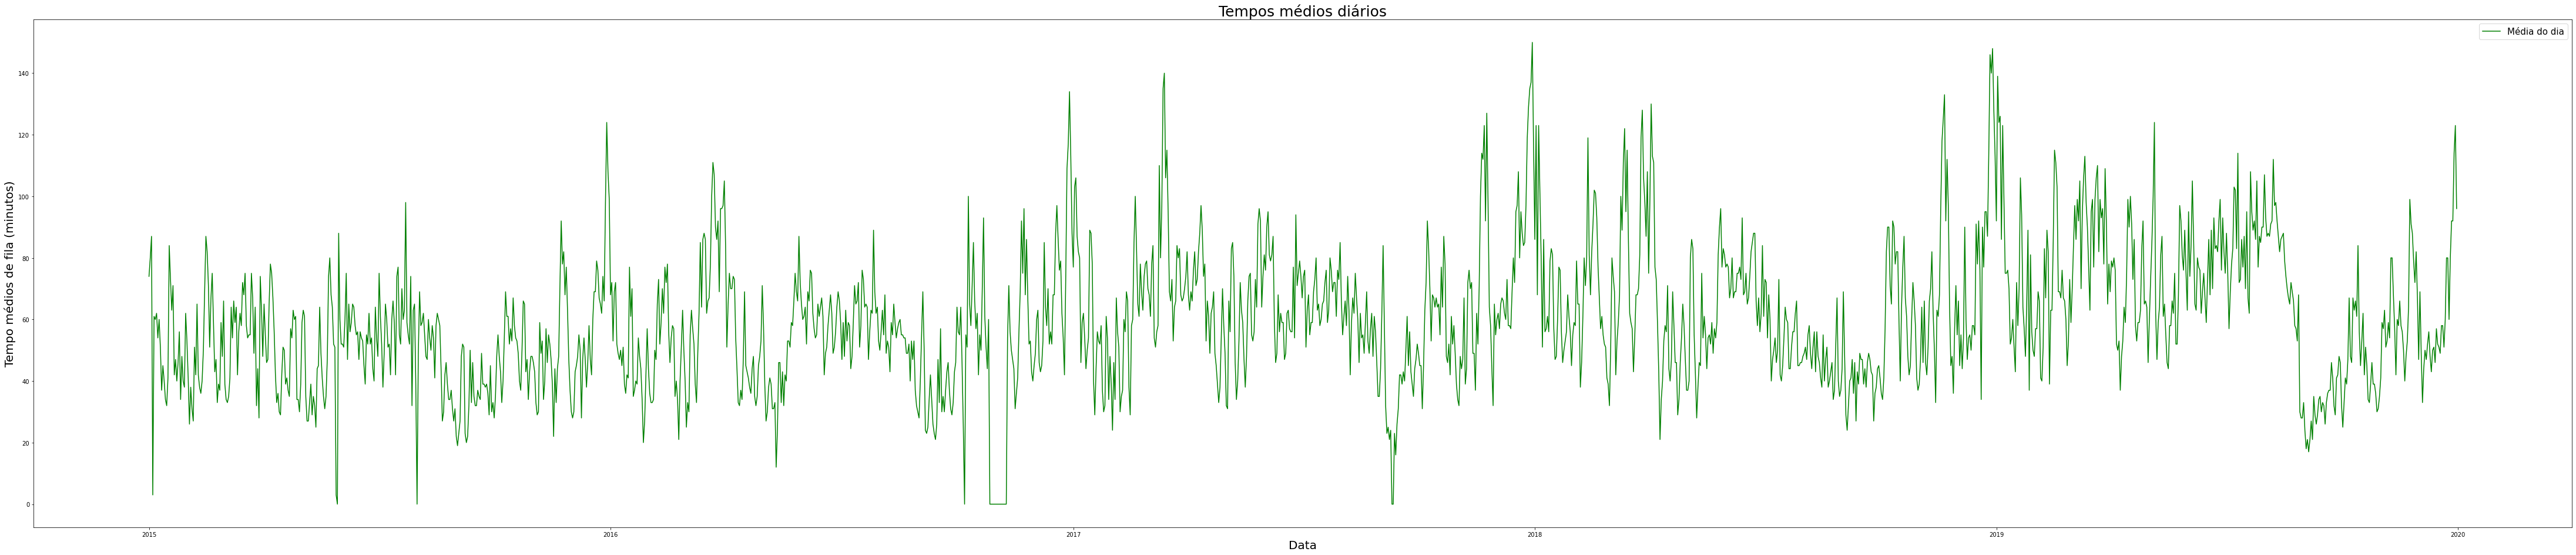

In [69]:
plot_cinco_anos()